# Notebook to test PyTorch Refactoring of Matrix methods to allow differentiability  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Matrix_methods.Simulate import simulate_reference, rts, RTm, simulate_parallel

Creates a pulse with following equation $x(t) = A*T*\exp{(-(\frac{T}{t_{width}})^2 - \frac{T}{\tau})}$ where $T = t-t_{offset}$ to centre the pulse at some delay time (in this case 10 ps), $A$ is just a scaling factor, $\tau$ is a decay rate, $t_{width}$ is a factor that gives a width the pulse.

This is what is used for the simulation and is the reference as well. ie this a pulse that has been through the equivelent thickness of air already, as the simulations take this into account...

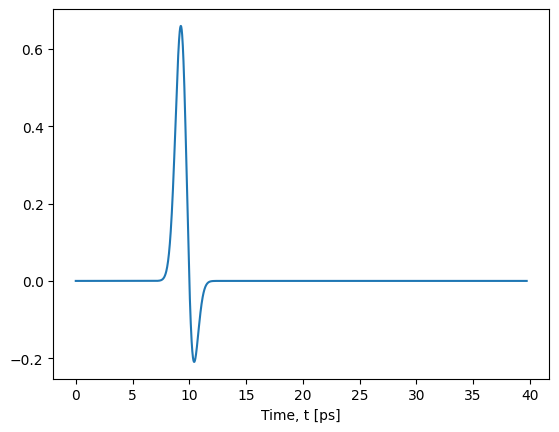

In [2]:
# Create Ref pulse
deltat = 0.0194e-12 # spacing in time
L = 2**11 # number of points in time domain

x = simulate_reference(L, deltat)
t_axis = np.arange(0,L*deltat, deltat)


plt.plot(t_axis*1e12, x)
plt.xlabel('Time, t [ps]')
plt.show()

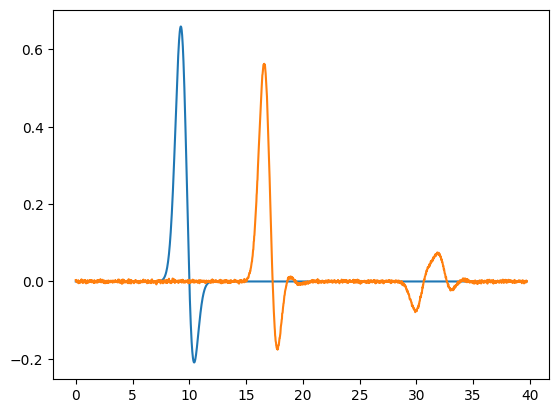

In [3]:
# FIRST TERM n, SECOND TERM d.
layers = [(2.0, 1.0e-3), (3.0, 0.1e-3), (2.0, 1.0e-3)] 

(T,y) = simulate_parallel(x, layers, deltat, 0.002)

# truncate to L points
y = y[0:L]

plt.plot(t_axis * 1e12, x)
plt.plot(t_axis * 1e12, y.detach().cpu().numpy())  # Detach and convert to NumPy
plt.show()

Here's an example of the simulation running muliple layers, n = 2,3,2 and d = 1,0.1,1 mm respectively


# Examples


## One slab, n = 2.5, d = 0.4 mm

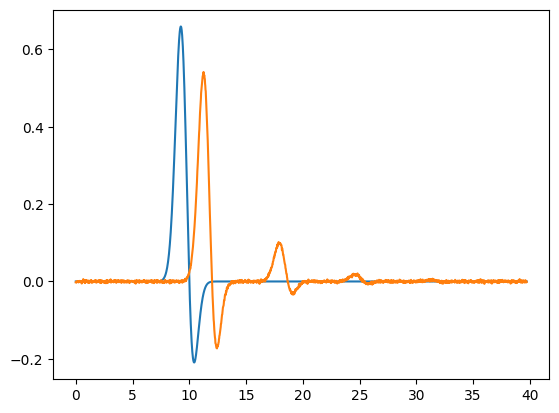

In [4]:

layers=[(2.5, 0.4e-3)] #FIRST TERM n, SECOND TERM d.
#layers=[(1.0, 100.0e-3)]
(T,y) = simulate_parallel(x, layers, deltat, 0.002)
# truncate to L points
y = y[0:L]

plt.plot(t_axis*1e12,x,t_axis*1e12,y.detach().cpu().numpy())
plt.show()

## One slab, n = 4, d = 0.2 mm

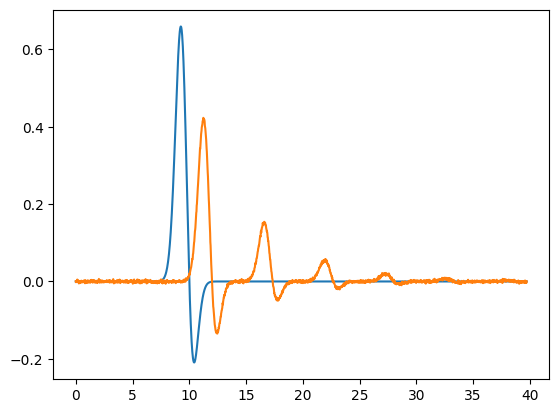

In [5]:
layers=[(4, 0.2e-3)] #FIRST TERM n, SECOND TERM d.
#layers=[(1.0, 100.0e-3)]
(T,y)=simulate_parallel(x, layers, deltat, 0.002)
# truncate to L points
y=y[0:L]

plt.plot(t_axis*10**12,x,t_axis*10**12,y.detach().cpu().numpy())
plt.show()

## Three layers, n = [2.2, 2.5 - 0.05i, 2.2], d = [0.2, 0.1, 0.2] mm

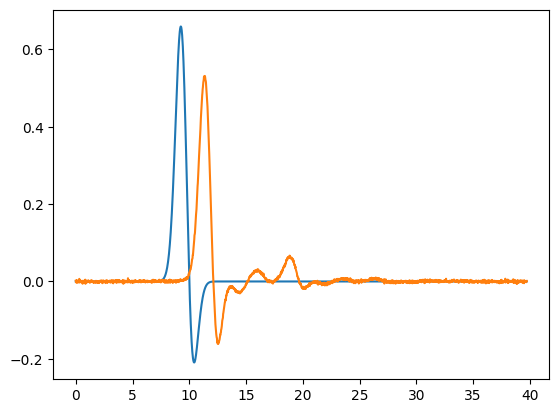

In [6]:
layers=[(2.2, 0.2e-3),(2.5 - 0.1j, 0.1e-3),(2.2, 0.2e-3)] #FIRST TERM n, SECOND TERM d.
#layers=[(1.0, 100.0e-3)]
(T,y)=simulate_parallel(x, layers, deltat, 0.002)
# truncate to L points
y=y[0:L]

plt.plot(t_axis*1e12,x,t_axis*1e12,y.detach().cpu().numpy())
plt.show()